In [1]:
import qspectra as qs
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ham = qs.ElectronicHamiltonian(np.array([[12881, 120], [120, 12719]]),
                               bath=qs.DebyeBath(qs.CM_K * 77, 35, 106),
                               dipoles=[[1, 0, 0], [2 * np.cos(.3), 2 * np.sin(.3), 0]])
dimer = qs.RedfieldModel(ham, hilbert_subspace='gef', discard_imag_corr=True, unit_convert=qs.CM_FS)

Parameters (other than bath) from [Yuen-Zhou et al., PNAS (2011)](http://arxiv.org/abs/1006.4866)

## 3rd order response in time domain

In [3]:
%%time
(t1, t2, t3), X = qs.third_order_response(dimer, coherence_time_max=1000,
                                          population_times=np.linspace(0, 1000, 50),
                                          geometry='-++', polarization='xxxx',
                                          include_signal='GSB,ESE,ESA')

CPU times: user 386 ms, sys: 25.8 ms, total: 412 ms
Wall time: 419 ms


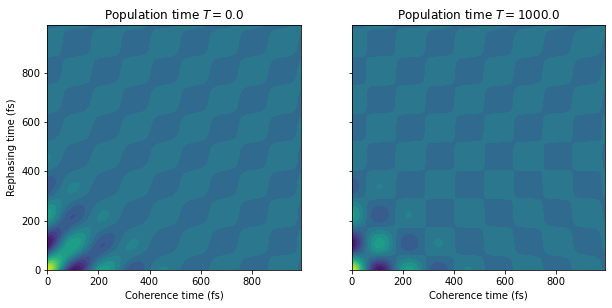

In [4]:
plt.figure(figsize=(10,4.5))
plt.subplot(121)
plt.title('Population time $T=%s$' % t2[0])
plt.contourf(t1, t3, X[:,0,:].real, 20);
plt.xlabel('Coherence time (fs)')
plt.ylabel('Rephasing time (fs)')
plt.subplot(122)
plt.title('Population time $T=%s$' % t2[-1])
plt.contourf(t1, t3, X[:,-1,:].real, 20);
plt.xlabel('Coherence time (fs)')
plt.gca().get_yaxis().set_ticklabels([]);

## Convert to 2D spectra

In [5]:
%%time
f1, X_ftt = qs.fourier_transform(t1, X, 0, rw_freq=dimer.rw_freq, sign=-1, unit_convert=qs.CM_FS)
f3, X_ftf = qs.fourier_transform(t3, X_ftt, 2, rw_freq=dimer.rw_freq, unit_convert=qs.CM_FS)

CPU times: user 146 ms, sys: 81.5 ms, total: 228 ms
Wall time: 262 ms


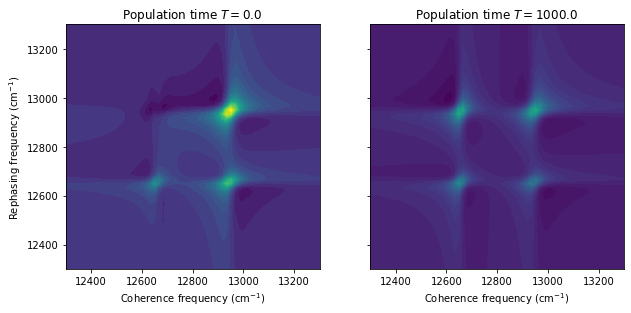

In [6]:
plt.figure(figsize=(10,4.5))
plt.subplot(121)
plt.title('Population time $T=%s$' % t2[0])
plt.contourf(f1, f3, X_ftf[:,0,:].real, 30, vmax=X_ftf.real.max())
plt.xlabel('Coherence frequency (cm$^{-1}$)')
plt.ylabel('Rephasing frequency (cm$^{-1}$)')
plt.xlim(12300, 13300)
plt.ylim(12300, 13300);

plt.subplot(122)
plt.title('Population time $T=%s$' % t2[-1])
plt.contourf(f1, f3, X_ftf[:,-1,:].real, 30, vmax=X_ftf.real.max())
plt.xlabel('Coherence frequency (cm$^{-1}$)')
plt.gca().get_yaxis().set_ticklabels([]);
plt.xlim(12300, 13300)
plt.ylim(12300, 13300);

Plot diagonal:

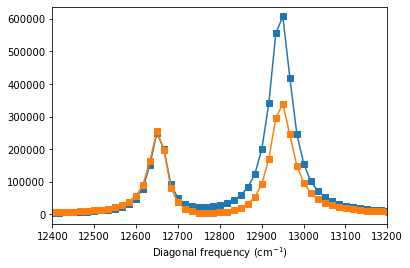

In [7]:
plt.plot(f1, np.einsum('iti->ti', X_ftf)[0].real, '-s');
plt.plot(f1, np.einsum('iti->ti', X_ftf)[-1].real, '-s');
plt.xlabel('Diagonal frequency (cm$^{-1}$)')
plt.xlim(12400, 13200);

Identify/plot cross-peaks

In [8]:
alpha, beta = np.argmin(np.abs(f1 - ham.E('e').reshape(-1, 1)), 1)
print(ham.E('e'))

[12655.22085786 12944.77914214]


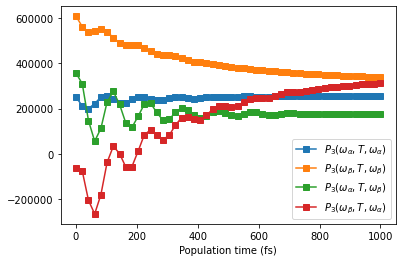

In [9]:
plt.plot(t2, X_ftf[alpha, :, alpha].real, '-s', label=r'$P_3(\omega_\alpha, T, \omega_\alpha)$')
plt.plot(t2, X_ftf[beta, :, beta].real, '-s', label=r'$P_3(\omega_\beta, T, \omega_\beta)$')
plt.plot(t2, X_ftf[alpha, :, beta].real, '-s', label=r'$P_3(\omega_\alpha, T, \omega_\beta)$')
plt.plot(t2, X_ftf[beta, :, alpha].real, '-s', label=r'$P_3(\omega_\beta, T, \omega_\alpha)$')
plt.xlabel('Population time (fs)')
plt.legend(loc='lower right');